In [1]:
from sklearn.neural_network import MLPClassifier 
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import rc
import matplotlib.ticker as ticker

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt

# 1. Load the Data
#df = pd.read_pickle("data_file/master_df_final.pkl")
df = pd.read_pickle("data_file/master_df_hd172555.pkl")
#master_df_hd172555

2024-08-27 22:21:57.717804: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-27 22:21:57.719128: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-27 22:21:57.746382: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-27 22:21:57.746882: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-27 22:21:58.206695: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [3]:
rc('text', usetex=False)
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14
plt.rcParams["font.family"] = "serif"
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=MEDIUM_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=MEDIUM_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.rc('legend', fontsize=MEDIUM_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

In [4]:
#GPT

In [5]:
#df

In [6]:
df2 = pd.read_csv("data_file/velocity_hd.csv")
df2

,Unnamed: 0,Velocity
0,0,-1532.015525
1,1,-1529.395335
2,2,-1526.775168
3,3,-1524.155023
4,4,-1521.534902
...,...,...
1166,1166,1507.703306
1167,1167,1510.297064
1168,1168,1512.890799
1169,1169,1515.484512


In [7]:
df3 = pd.read_pickle("data_file/master_df_hd172555_1.pkl")
df3

,Object,Flux,MJD-Obs,Date-Obs
0,ADP.2014-10-01T10:21:59.297,"[0.82064288854599, 0.8216624408960342, 0.82196...",53147.209007,2004-05-22T05:00:58.227
1,ADP.2014-10-01T10:23:12.613,"[0.8084616661071777, 0.8129723221063614, 0.825...",53147.214264,2004-05-22T05:08:32.442
2,ADP.2014-10-01T10:19:23.563,"[0.8131369352340698, 0.8200299441814423, 0.815...",53147.219533,2004-05-22T05:16:07.656
3,ADP.2014-10-01T10:21:02.330,"[0.827789306640625, 0.8204552382230759, 0.8106...",53147.255803,2004-05-22T06:08:21.409
4,ADP.2014-10-01T10:22:20.273,"[0.8174574375152588, 0.8118058145046234, 0.809...",53147.259888,2004-05-22T06:14:14.362
...,...,...,...,...
134,ADP.2016-04-20T08:25:54.640,"[0.8067248463630676, 0.8147405385971069, 0.806...",57494.332932,2016-04-16T07:59:25.289
135,ADP.2016-04-20T08:25:54.642,"[0.8204373121261597, 0.8111877888441086, 0.810...",57494.334449,2016-04-16T08:01:36.366
136,ADP.2016-04-20T08:25:54.650,"[0.8134812712669373, 0.8066895008087158, 0.801...",57494.335964,2016-04-16T08:03:47.293
137,ADP.2016-04-20T08:25:54.656,"[0.8065048456192017, 0.8109097182750702, 0.807...",57494.338996,2016-04-16T08:08:09.288


In [8]:
#len(reconstructed_flux)

In [9]:
#flux_normalized.shape

In [10]:
# 2. Extract the Flux Data (columns 0 to 1169)
flux_data = df.iloc[:, 0:1170].values
# 3. Normalize the Flux Data
scaler = MinMaxScaler()
scaler2 = StandardScaler()
flux_normalized = scaler2.fit_transform(flux_data)

In [11]:
#df

In [12]:
X_train, X_test = train_test_split(flux_normalized, test_size=0.2, random_state=42)

In [13]:
#len(flux_normalized)

In [14]:
#len(X_train)

In [15]:
#len(X_test)

In [16]:
#flux_data

In [17]:
#flux_normalized

In [18]:
#flux_normalized.shape[1]

In [19]:
# 4. Define the Autoencoder
input_dim = flux_normalized.shape[1]
input_layer = Input(shape=(input_dim,))

In [20]:
# Encoder
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

#Dense: A fully connected neural network layer. The numbers (128, 64, 32) represent the number of neurons in each layer.
#activation='relu': Uses the ReLU (Rectified Linear Unit) activation function, which introduces non-linearity.

# Decoder
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_dim, activation='linear')(decoded) # Here the activation function was sigmoid, now is linear

#The decoder mirrors the encoder but in reverse.
#activation='sigmoid': The final layer uses the sigmoid function to ensure the output values are between 0 and 1,
#matching the normalized input data. We change the normalization from MinMax to Standard scale so we use Linear function to compensate 
#the shape 

# Autoencoder Model
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse') #Mean Squared Error

# 5. Train the Autoencoder
history = autoencoder.fit(X_train, X_train, 
                epochs=50, 
                batch_size=256, 
                shuffle=True, 
                validation_data = [X_test, X_test],
                validation_split=0.2)

#fit: Trains the model.

#    flux_normalized: Both the input and target are the same since it's an autoencoder.
#    epochs=50: The model will iterate over the entire dataset 50 times.
#    batch_size=256: Number of samples per gradient update.
#    shuffle=True: Shuffles the data before each epoch to reduce overfitting.
#    validation_split=0.2: Uses 20% of the data for validation to monitor the model's performance on unseen data

Epoch 1/50


2024-08-27 22:22:46.583179: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-27 22:22:46.587519: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


1/1 [==============================] - 1s 585ms/step - loss: 0.9888 - val_loss: 1.0628
Epoch 2/50
1/1 [==============================] - 0s 18ms/step - loss: 0.9794 - val_loss: 1.0409
Epoch 3/50
1/1 [==============================] - 0s 21ms/step - loss: 0.9619 - val_loss: 1.0066
Epoch 4/50
1/1 [==============================] - 0s 22ms/step - loss: 0.9360 - val_loss: 0.9654
Epoch 5/50
1/1 [==============================] - 0s 21ms/step - loss: 0.9061 - val_loss: 0.9297
Epoch 6/50
1/1 [==============================] - 0s 22ms/step - loss: 0.8798 - val_loss: 0.8915
Epoch 7/50
1/1 [==============================] - 0s 22ms/step - loss: 0.8497 - val_loss: 0.8577
Epoch 8/50
1/1 [==============================] - 0s 19ms/step - loss: 0.8214 - val_loss: 0.8252
Epoch 9/50
1/1 [==============================] - 0s 19ms/step - loss: 0.7941 - val_loss: 0.7967
Epoch 10/50
1/1 [==============================] - 0s 20ms/step - loss: 0.7687 - val_loss: 0.7728
Epoch 11/50
1/1 [======================

In [21]:
#encoded
#np.save("history_loss",history.history["loss"])
#np.save("history_val_loss",history.history["val_loss"])

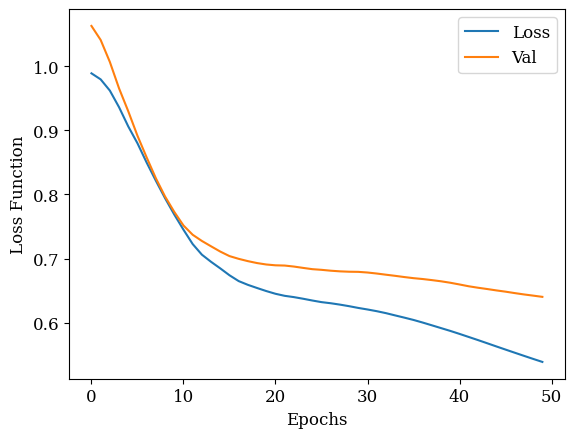

In [22]:
plt.plot(history.history["loss"], label ="Loss")
plt.plot(history.history["val_loss"], label = "Val")
plt.xlabel("Epochs")
plt.ylabel("Loss Function")
plt.legend()
plt.show() #Comparar batch size 

In [23]:
# np.save("batch_size64_loss_function",np.array(history.history["loss"]))
# np.save("batch_size64_val_function",np.array(history.history["val_loss"]))

In [24]:
# 6. Detect Anomalies
reconstructed_flux = autoencoder.predict(flux_normalized)
mse = np.mean(np.power(flux_normalized - reconstructed_flux, 2), axis=1)

#mse: Calculates the Mean Squared Error (MSE) between the original and reconstructed data for each observation.
#High MSE indicates a poor reconstruction, which could signal an anomaly.

# Set a threshold for anomaly detection (e.g., 95th percentile)
threshold = np.percentile(mse, 99)
anomalies = mse > threshold

#np.percentile(mse, 95): Determines the MSE value at the 95th percentile. 
#Observations with MSE above this threshold are considered anomalies.
#anomalies = mse > threshold: A boolean array where True indicates an anomaly.

5/5 [==============================] - 0s 1ms/step


In [25]:
# #anomalous_data_indices

# d = {"Flux": list(reconstructed_flux)}
# data = pd.DataFrame(data=d)
# #np.savetxt("reconstructed_flux", reconstructed_flux)

# #np.savetxt('reconstructed_flux.txt', reconstructed_flux)   # X is an array

# # df_anomalous = pd.read_pickle("default_anomalous.pkl")
# # df_anomalous

In [26]:
#data.to_pickle("reconstructed_fluxes.pkl")

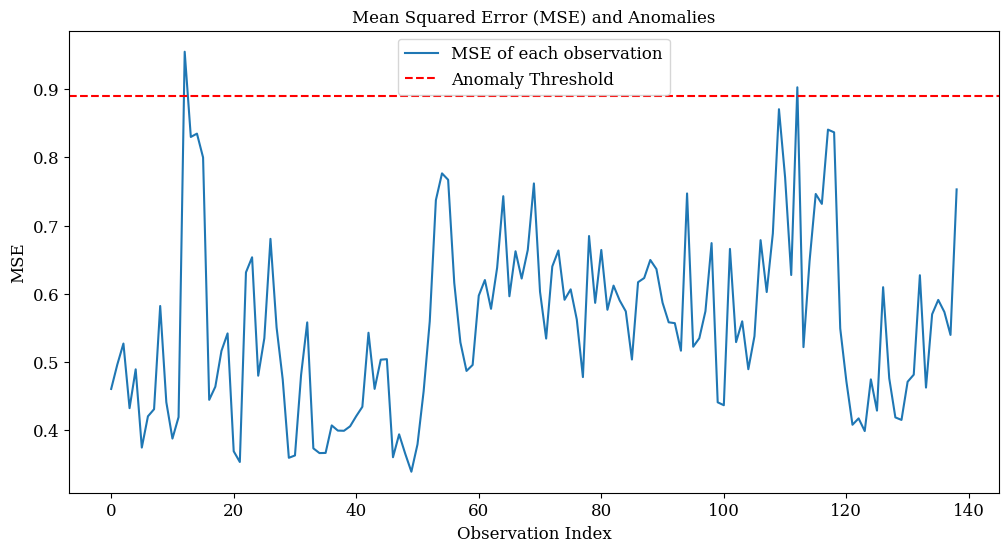

Anomalous Data Indices: [ 12 112]


In [27]:
# 7. Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(mse, label='MSE of each observation')
plt.axhline(y=threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.title('Mean Squared Error (MSE) and Anomalies')
plt.xlabel('Observation Index')
plt.ylabel('MSE')
plt.legend()
plt.show()

# 8. Analyze Anomalies
anomalous_data_indices = np.where(anomalies)[0]
print(f"Anomalous Data Indices: {anomalous_data_indices}")

In [28]:
#mse[]

In [29]:
len(anomalous_data_indices)

2

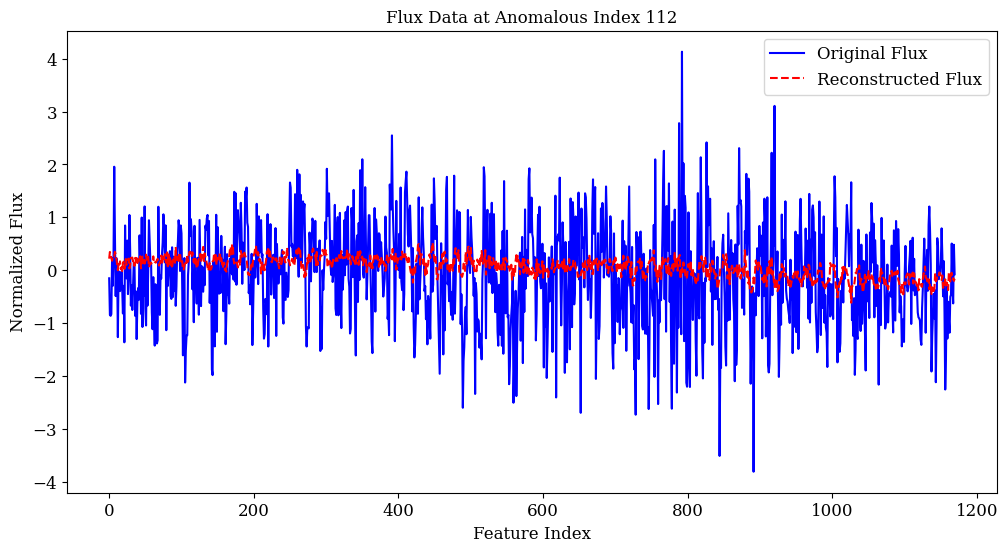

In [30]:
#import matplotlib.pyplot as plt

# Index of the first anomaly
anomalous_index = anomalous_data_indices[1]

# Extract the original and reconstructed flux for the anomalous index
original_flux = flux_normalized[anomalous_index]
reconstructed_flux_at_index = reconstructed_flux[anomalous_index]

# Plot the original and reconstructed flux
plt.figure(figsize=(12, 6))
plt.plot(original_flux, label='Original Flux', color='blue')
plt.plot(reconstructed_flux_at_index, label='Reconstructed Flux', color='red', linestyle='--')
plt.title(f'Flux Data at Anomalous Index {anomalous_index}')
plt.xlabel('Feature Index')
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()

In [31]:
########################################################

In [32]:
denormalized_output = scaler2.inverse_transform(reconstructed_flux)

# fig, ax = plt.subplots(figsize = (16,9))

# ax.set_xlabel("X-axis")
# ax.set_ylabel("Y-axis")

# ax.plot(df2["Velocity"][0:-1], df3["Flux"][14]) #Input plot
# ax.plot(df2["Velocity"][0:-1], denormalized_output[2]) #Input plot

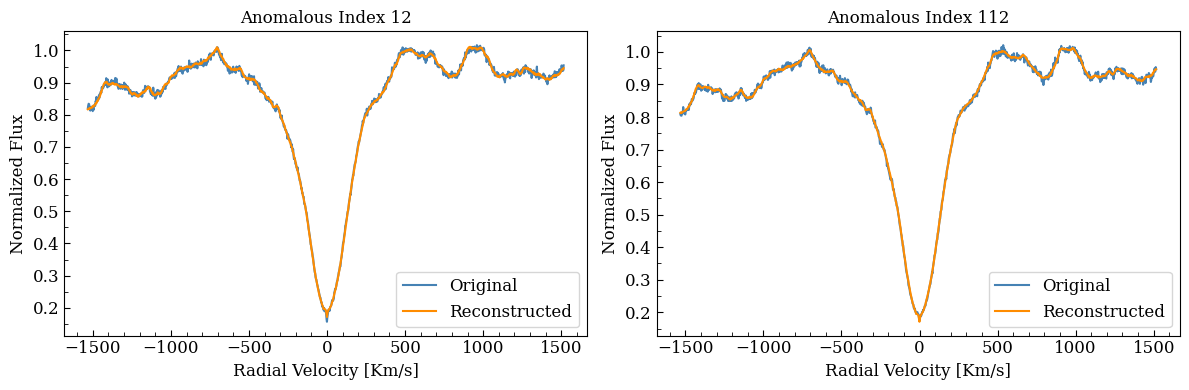

In [33]:
# Create subplots
fig, axes = plt.subplots(1,2, figsize=(12, 4))

# Iterate over anomalous indices
for i, index in enumerate(anomalous_data_indices):
    ax = axes[i]  # Get the current subplot

    # Extract original and reconstructed spectra
    original_spectrum = df3["Flux"][index]
    reconstructed_spectrum = denormalized_output[index]
#'steelblue', 'darkorange', 
    # Plot spectra
    ax.plot(df2["Velocity"][0:-1], original_spectrum, label="Original", color="steelblue")
    ax.plot(df2["Velocity"][0:-1], reconstructed_spectrum, label="Reconstructed",c="darkorange")

    # Set subplot labels and title
    ax.set_xlabel("Radial Velocity [Km/s]")
    ax.set_ylabel("Normalized Flux")
    ax.set_title(f"Anomalous Index {index}")

    # Add legend
    ax.legend(loc=4)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(500))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))    
    ax.tick_params(axis='x', which='both', direction='in', length=4)
    ax.tick_params(axis='x', which='minor', direction='in', length=3)
    ax.tick_params(axis='y', which='both', direction='in', length=4)
    ax.tick_params(axis='y', which='minor', direction='in', length=3)
    #ax.set_xlim(-500,500)

# Adjust spacing between subplots
plt.tight_layout()

#plt.show()
#fig.savefig("Anomalous_comparison_HD.png")

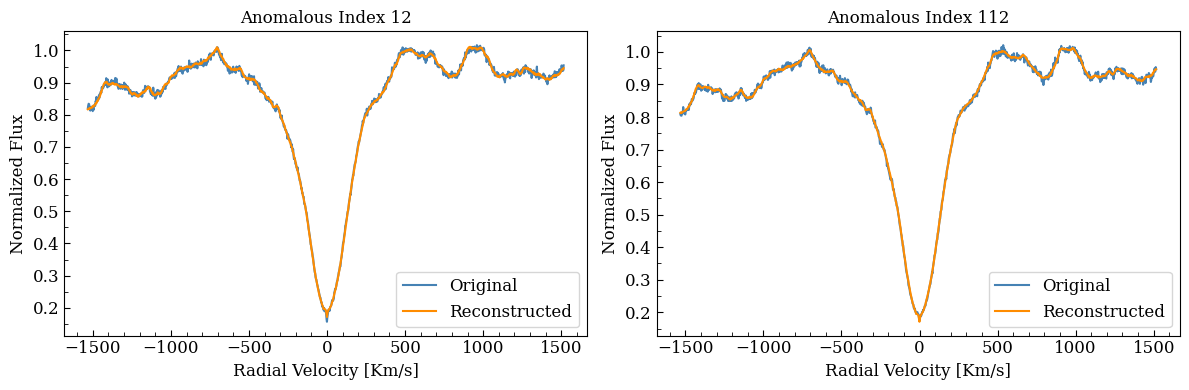

In [34]:
# Create subplots
fig, axes = plt.subplots(1,2, figsize=(12, 4))

# Iterate over anomalous indices
for i, index in enumerate(anomalous_data_indices):
    ax = axes[i]  # Get the current subplot

    # Extract original and reconstructed spectra
    original_spectrum = df3["Flux"][index]
    reconstructed_spectrum = denormalized_output[index]
#'steelblue', 'darkorange', 
    # Plot spectra
    ax.plot(df2["Velocity"][0:-1], original_spectrum, label="Original", color="steelblue")
    ax.plot(df2["Velocity"][0:-1], reconstructed_spectrum, label="Reconstructed",c="darkorange")

    # Set subplot labels and title
    ax.set_xlabel("Radial Velocity [Km/s]")
    ax.set_ylabel("Normalized Flux")
    ax.set_title(f"Anomalous Index {index}")

    # Add legend
    ax.legend(loc=4)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(500))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))    
    ax.tick_params(axis='x', which='both', direction='in', length=4)
    ax.tick_params(axis='x', which='minor', direction='in', length=3)
    ax.tick_params(axis='y', which='both', direction='in', length=4)
    ax.tick_params(axis='y', which='minor', direction='in', length=3)
    #ax.set_xlim(-500,500)

# Adjust spacing between subplots
plt.tight_layout()

#plt.show()
#fig.savefig("Anomalous_comparison_HD.png")

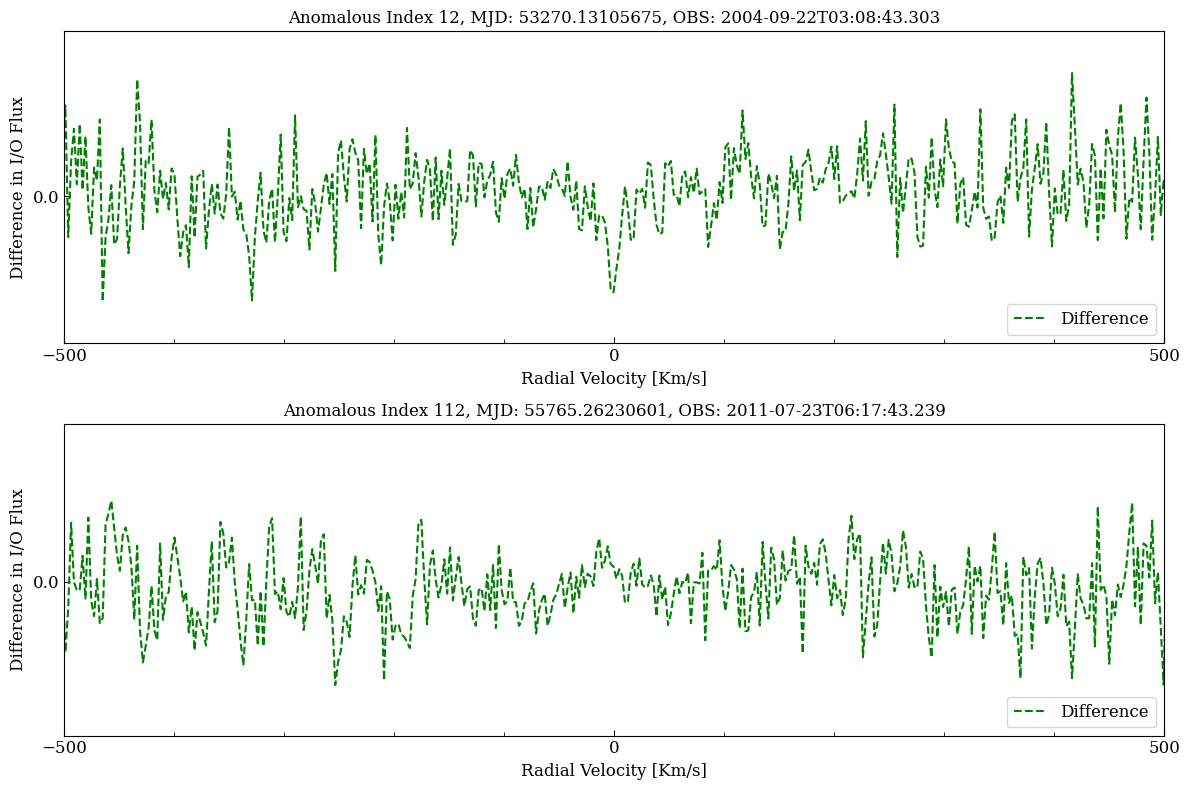

In [35]:
# Create subplots based on the number of anomalous indices
num_rows = len(anomalous_data_indices)
fig, axes = plt.subplots(num_rows, 1, figsize=(12, 4 * num_rows))  # 1 column for each index

# Iterate over anomalous indices
for i, index in enumerate(anomalous_data_indices):
    ax = axes[i]  # Get the current subplot

    # Extract original and reconstructed spectra
    original_spectrum = df3["Flux"][index]
    mjd = df3["MJD-Obs"][index]
    obs = df3["Date-Obs"][index]
    
    reconstructed_spectrum = denormalized_output[index]

    # Calculate the difference
    difference = original_spectrum - reconstructed_spectrum

    # Plot spectra and difference
    #ax.plot(df2["Velocity"][0:-1], original_spectrum, label="Original", color="steelblue")
    #ax.plot(df2["Velocity"][0:-1], reconstructed_spectrum, label="Reconstructed", color="darkorange")
    ax.plot(df2["Velocity"][0:-1], difference, label="Difference", color="green", linestyle="--")  # Plot the difference

    # Set subplot labels and title
    ax.set_xlabel("Radial Velocity [Km/s]")
    ax.set_ylabel("Difference in I/O Flux")
    ax.set_title(f"Anomalous Index {index}, MJD: {mjd}, OBS: {obs}")

    # Add legend
    ax.legend(loc=4)

    # Set ticks and grid (optional, adjust as needed)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(500))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
    ax.tick_params(axis='x', which='both', direction='in', length=4)
    ax.tick_params(axis='x', which='minor', direction='in', length=3)
    ax.tick_params(axis='y', which='both', direction='in', length=4)
    ax.tick_params(axis='y', which='minor', direction='in', length=3)

    # Set x-axis limits (optional)
    ax.set_xlim(-500, 500)

# Adjust spacing between subplots
plt.tight_layout()

# Save the figure
#plt.savefig("Anomalous_comparison_HD.png")

In [40]:
original_spectrum

array([0.80914715, 0.80499904, 0.80415239, ..., 0.93945756, 0.95332744,
       0.94769488])

In [41]:
reconstructed_spectrum

array([0.8129284 , 0.814402  , 0.8135818 , ..., 0.9443369 , 0.94670707,
       0.94683367], dtype=float32)

In [36]:
#Hacer la diferencia entre ambas y ver la fecha juliana, comparando con el paper 
df3["MJD-Obs"][index] 

55765.26230601

In [37]:
df3["Date-Obs"][index] 

'2011-07-23T06:17:43.239'

In [39]:
original_spectrums

NameError: name 'original_spectrums' is not defined

In [51]:
original_spectrums

NameError: name 'original_spectrums' is not defined

In [48]:
#original_spectrum = df3["Flux"]
original_spectrum[0]

array([0.82064289, 0.82166244, 0.82196571, ..., 0.93784151, 0.95138532,
       0.93890333])

In [49]:
reconstructed_spectrum[0]

array([0.82001376, 0.8180532 , 0.8186947 , ..., 0.9390366 , 0.9384935 ,
       0.94182646], dtype=float32)

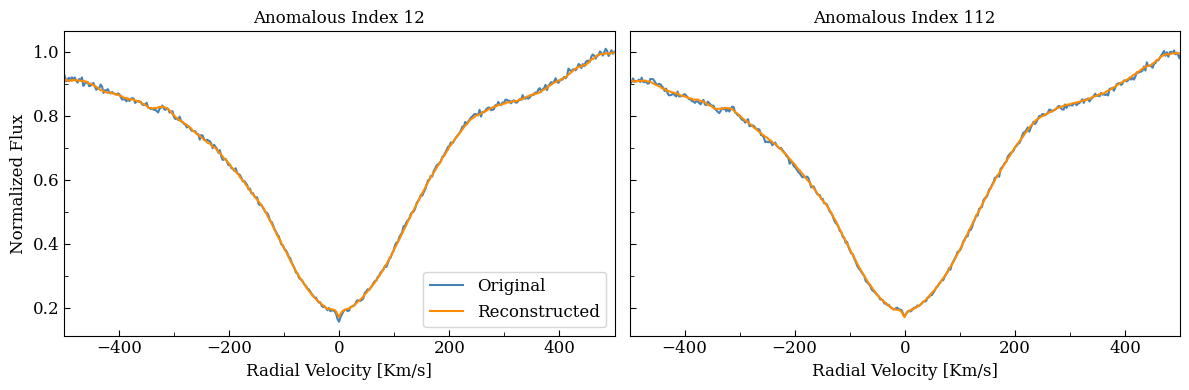

In [53]:
############################################################
num_indices = len(anomalous_data_indices)

num_cols = 2
num_rows = (num_indices + num_cols - 1) // num_cols  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows), sharex=True, sharey=True)

axes = axes.flatten()

for i, index in enumerate(anomalous_data_indices):
    ax = axes[i] 
    
    original_spectrum = df3["Flux"][index]
    reconstructed_spectrum = denormalized_output[index]

    ax.plot(df2["Velocity"][0:-1], original_spectrum, color="steelblue")
    ax.plot(df2["Velocity"][0:-1], reconstructed_spectrum, color="darkorange")
    
    if i % num_cols == 0:  
        ax.set_ylabel("Normalized Flux") 

    if i == 0: 
        ax.legend(["Original", "Reconstructed"], loc=4)
    
    ax.set_xlabel("Radial Velocity [Km/s]")
    ax.set_title(f"Anomalous Index {index}")

    ax.xaxis.set_major_locator(ticker.MultipleLocator(200))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
    ax.tick_params(axis='x', which='both', direction='in', length=4)
    ax.tick_params(axis='x', which='minor', direction='in', length=3)
    ax.tick_params(axis='y', which='both', direction='in', length=4)
    ax.tick_params(axis='y', which='minor', direction='in', length=3)

    ax.set_xlim(-500, 500)

for i in range(num_indices, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
# plt.savefig("Anomalous_comparison_HD.png")
plt.show()